# Team B Project

## Impo

In [1]:
#import box
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
#loading in data
BrentOilPrices = pd.read_csv('BrentOilPrices.csv',parse_dates=True)
#plt.plot(BrentOilPrices['Price'])
BrentOilPrices.std()
import_countries = pd.read_csv('ImportCountries.csv',delimiter=',')

'''for i in BrentOilPricesGlobal['LOCATION']:
    if i == 'AUS':
        print(BrentOilPricesGlobal[i]['PRICE'])'''

'''BrentOilAus = BrentOilPricesGlobal.iloc[0:42]
BrentOilAusVal = BrentOilAus['Value']
plt.plot(range(len(BrentOilAus['TIME'])),BrentOilAusVal)

BrentOilAut = BrentOilPricesGlobal.iloc[43:81]
BrentOilAutVal = BrentOilAut['Value']
plt.plot(range(len(BrentOilAut['TIME'])),BrentOilAutVal)

#right now our x axis is in undefined units'''

BrentOilPrices

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
8549,19-Jan-21,55.38
8550,20-Jan-21,55.66
8551,21-Jan-21,55.68
8552,22-Jan-21,55.22


In [3]:
BrentOilPrices.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [4]:
import_countries.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,OILIMPPRICE,TOT,USD_BAR,A,1980,31.81,NaN
1,AUS,OILIMPPRICE,TOT,USD_BAR,A,1981,35.88,NaN
2,AUS,OILIMPPRICE,TOT,USD_BAR,A,1982,35.42,NaN
3,AUS,OILIMPPRICE,TOT,USD_BAR,A,1983,30.88,NaN
4,AUS,OILIMPPRICE,TOT,USD_BAR,A,1984,29.19,NaN


In [5]:
import_countries.FREQUENCY.unique()

array(['A', 'Q', 'M'], dtype=object)

## Initial looks at data

In [6]:
BrentOilPrices[["day", "month", "year"]] = BrentOilPrices["Date"].str.split("-", expand = True)
BrentOilPricesMonthly = BrentOilPrices[BrentOilPrices['day']== '1']
BrentOilPricesMonthly.head()

,Date,Price,day,month,year
8,1-Jun-87,18.65,1,Jun,87
29,1-Jul-87,18.98,1,Jul,87
73,1-Sep-87,18.43,1,Sep,87
95,1-Oct-87,18.50,1,Oct,87
138,1-Dec-87,17.65,1,Dec,87


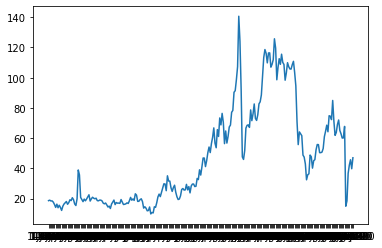

In [7]:
plt.plot(BrentOilPricesMonthly['Date'],BrentOilPricesMonthly['Price'])

In [8]:
oil_x = BrentOilPricesMonthly['Date']

## Potential Model

Test RMSE: 10.443


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


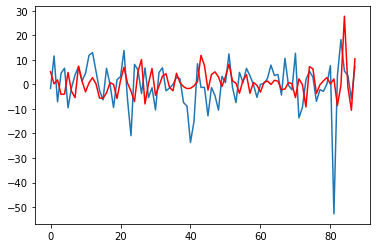

In [9]:
#function to get difference between price and previous years price
def difference(df):
    diff = list()
    for i in range(1,len(df)):
        value = df[i] - df[i -1]
        diff.append(value)
    return np.array(diff)

#predicts price based on history and coeffecients
def predict(coef,history):
    yhat = coef[0]
    for i in range(1,len(coef)):
        yhat +=coef[i] * history[-i]
    return yhat 

#builds difference variable, and splits in train and test
x = difference(list(BrentOilPricesMonthly['Price']))
size = int(len(x) *.66)
train,test = x[0:size],x[size:]

#Builds Autoregession model 
window = 6 
model = AutoReg(train, lags=6)
model_fit = model.fit()
coef = model_fit.params 


#going through and making predictions
history = [train[i] for i in range(len(train))]
predictions = list()
for t in range(len(test)):
    yhat = predict(coef,history)
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
rmse = sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.3f' % rmse)

#plotting predictions vs actual
plt.plot(test)
plt.plot(predictions,color='red')
plt.show()



In [10]:
model_fit.params 

array([ 0.47236258,  0.19799712, -0.02449749, -0.43358889,  0.01889444,
        0.03561501, -0.24780747])

# Import Countries SVM 

In [196]:
import sklearn.datasets
from sklearn import svm
import sklearn
from sklearn.decomposition import PCA

In [197]:
clean_data = import_countries[:279].drop(labels = ["INDICATOR", "SUBJECT", "MEASURE", "FREQUENCY", "Flag Codes"] , axis = 1)
clean_data = clean_data.dropna(axis = 0)

clean_data

,LOCATION,TIME,Value
0,AUS,1980,31.81
1,AUS,1981,35.88
2,AUS,1982,35.42
3,AUS,1983,30.88
4,AUS,1984,29.19
...,...,...,...
274,FIN,2014,97.53
275,FIN,2015,49.28
276,FIN,2016,42.19
277,FIN,2017,53.04


In [198]:
names = ('AUS', 'AUT', 'BEL', ' CAN', 'CZE','DNK', 'FIN')
def yearly_difference(df, names):
    df['diff'] = np.zeros(len(df['Value']))
    for i in range(1,len(df)+28):
        #Series of if statements skip the indexes that were removed by dropna()
            if i in range(160,173):
                continue
            if i in range(176, 181):
                continue
            if i in range(240,253):
                continue
            if i in range(280, 293):
                continue
        #Creating the difference for each country each year
            if df['LOCATION'][i] == df['LOCATION'][i-1]:
                df['diff'][i] = df['Value'][i]-df['Value'][i-1]

def pct_change(df):
    #Creating the percentage change in price for each year 
    df['Pct_Chng'] = df['diff']/df['Value']

    
yearly_difference(clean_data, names)
pct_change(clean_data)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [208]:
labels = clean_data['LOCATION']
features = clean_data[['Value','diff','Pct_Chng']]
names = labels.unique()

train_data, test_data, train_labs, test_labs = sklearn.model_selection.train_test_split(features,labels, 
                                                                                        random_state = 3)

In [209]:
clean_data[['Value','diff','Pct_Chng']]

,Value,diff,Pct_Chng
0,31.81,0.00,0.000000
1,35.88,4.07,0.113434
2,35.42,-0.46,-0.012987
3,30.88,-4.54,-0.147021
4,29.19,-1.69,-0.057897
...,...,...,...
274,97.53,-10.04,-0.102943
275,49.28,-48.25,-0.979099
276,42.19,-7.09,-0.168049
277,53.04,10.85,0.204563


In [216]:
train_data = np.array(train_data)
test_data = np.array(test_data)

my_model = svm.SVC(kernel='linear', C = 0.01)
my_model.fit(test_data,test_labs)
y_pred = my_model.predict(test_data)

print("Confusion Matrix")
print(sklearn.metrics.confusion_matrix(test_labs, y_pred,labels=names),'\n')

print("Classification Report \n")
print(sklearn.metrics.classification_report(test_labs,y_pred, target_names=names, zero_division=0))

Confusion Matrix
[[ 1  7  0  1  0  2  0]
 [ 1 10  0  2  0  1  0]
 [ 0  2  2  3  0  0  0]
 [ 0  9  1  1  0  0  0]
 [ 0  3  0  1  0  1  0]
 [ 1  5  0  2  0  2  0]
 [ 0  3  0  2  0  0  0]] 

Classification Report 

              precision    recall  f1-score   support

         AUS       0.33      0.09      0.14        11
         AUT       0.26      0.71      0.38        14
         BEL       0.67      0.29      0.40         7
         CAN       0.08      0.09      0.09        11
         CZE       0.00      0.00      0.00         5
         DNK       0.33      0.20      0.25        10
         FIN       0.00      0.00      0.00         5

    accuracy                           0.25        63
   macro avg       0.24      0.20      0.18        63
weighted avg       0.26      0.25      0.21        63



# PCA and Best Fit Model

In [211]:
n_components = 3

pca = PCA(n_components=n_components, whiten=True)
_ = pca.fit(train_data)

pca_train_vectors = pca.transform(train_data)
pca_test_vectors = pca.transform(test_data)

print("Training set changed from a size of: ", train_data.shape, ' to: ', pca_train_vectors.shape)
print("Testing set changed from a size of: ", test_data.shape, ' to: ', pca_test_vectors.shape)
print("")
print('Explained Variance Ratio: ',pca.explained_variance_ratio_)

Training set changed from a size of:  (188, 3)  to:  (188, 3)
Testing set changed from a size of:  (63, 3)  to:  (63, 3)

Explained Variance Ratio:  [8.27014191e-01 1.72971035e-01 1.47744682e-05]


In [212]:
linear_model = svm.SVC(kernel='linear', C = [1e-3, 0.01, 0.1, 1, 10, 100],gamma = [1e-6, 1e-5, 1e-4, 1e-3, 0.01, 0.1])
rbf_model = svm.SVC(kernel='rbf', C = [1e-3, 0.01, 0.1, 1, 10, 100],gamma = [1e-6, 1e-5, 1e-4, 1e-3, 0.01, 0.1])

#GridSearch
param_grid = {'kernel':('rbf','linear'), 'C': [1e-3, 0.01, 0.1, 1, 10, 100],'gamma': [1e-6, 1e-5, 1e-4, 1e-3, 0.01, 0.1]}
clf = sklearn.model_selection.GridSearchCV(svm.SVC(), param_grid, n_jobs=-1)
clf = clf.fit(train_data, train_labs)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Best estimator found by grid search:
SVC(C=100, gamma=1e-06, kernel='linear')


# Best Fit Model

In [215]:
#SVM Model using the best estimator parameters from PCA
my_model = svm.SVC(kernel='linear', C=100, gamma=1e-06)
my_model.fit(test_data,test_labs)
y_pred = my_model.predict(test_data)

print("Confusion Matrix")
print(sklearn.metrics.confusion_matrix(test_labs, y_pred,labels=names),'\n')

print("Classification Report \n")
print(sklearn.metrics.classification_report(test_labs,y_pred, target_names=names, zero_division= 0))

Confusion Matrix
[[0 3 0 5 0 2 1]
 [0 9 0 4 0 1 0]
 [0 2 2 3 0 0 0]
 [0 1 1 7 0 0 2]
 [0 2 1 1 0 1 0]
 [0 4 0 2 0 2 2]
 [0 0 2 2 0 0 1]] 

Classification Report 

              precision    recall  f1-score   support

         AUS       0.00      0.00      0.00        11
         AUT       0.43      0.64      0.51        14
         BEL       0.33      0.29      0.31         7
         CAN       0.29      0.64      0.40        11
         CZE       0.00      0.00      0.00         5
         DNK       0.33      0.20      0.25        10
         FIN       0.17      0.20      0.18         5

    accuracy                           0.33        63
   macro avg       0.22      0.28      0.24        63
weighted avg       0.25      0.33      0.27        63



1255

# References

- https://machinelearningmastery.com/make-predictions-time-series-forecasting-python/